<a href="https://colab.research.google.com/github/Samrat-Doi/Samrat-Doi/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer

#Descriptive Analysis

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.shape

(891, 12)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
target = df.pop('Survived')

In [ ]:
df.insert(11,'Survived',target)

In [ ]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000


# Filing Missing values

In [ ]:
 df.Age.fillna(df.Age.median(), inplace = True)


In [ ]:
df['Cabin'] = SimpleImputer(missing_values = np.nan , strategy= 'most_frequent')

In [ ]:
df.Embarked.fillna('S', inplace = True)

In [ ]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
dtype: int64

# Data Visualization

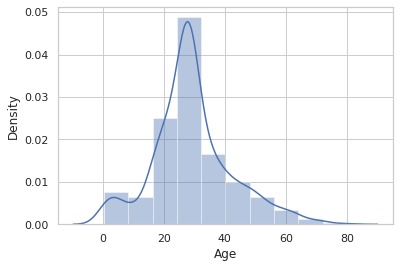

In [ ]:
sns.distplot(df['Age'], bins =10)

Count Plots

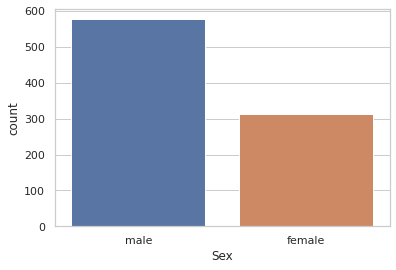

In [ ]:
sns.set_theme(style='whitegrid')
sns.countplot( x ='Sex', data = df)

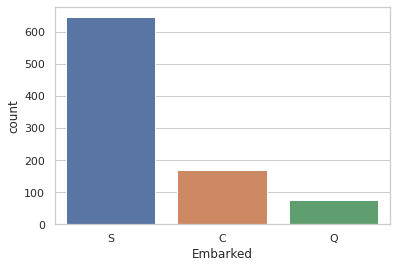

In [ ]:
sns.countplot(x = 'Embarked', data = df)

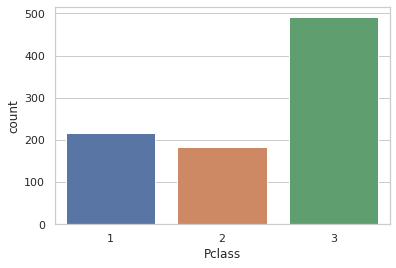

In [ ]:
sns.countplot(x = 'Pclass', data =df)

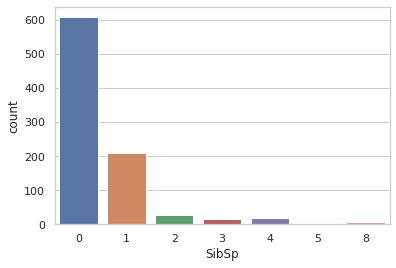

In [ ]:

sns.countplot(x = 'SibSp', data = df)

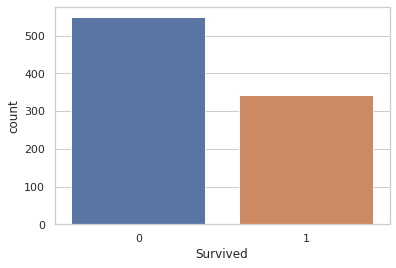

In [ ]:
sns.countplot(x = 'Survived', data =df)

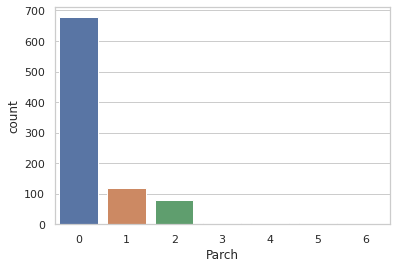

In [ ]:

sns.countplot(x = 'Parch', data = df)

Inferences:
1. There were 1.8 times males to females.
2. 72.5 percent of people embarked from Southhampton.
3. 55.1 percent of people were third class passengers.
4. 76.09 percent people out of total boarded without their parents or children or had none.

## Bivariate plots

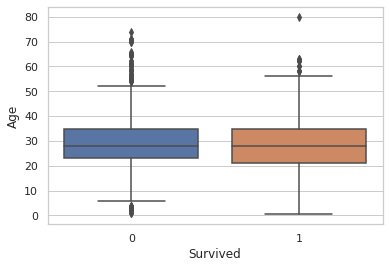

In [ ]:
sns.boxplot(x = 'Survived', y ='Age', data = df)

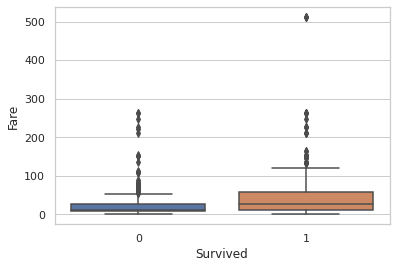

In [ ]:
sns.boxplot(x = 'Survived', y ='Fare', data= df)

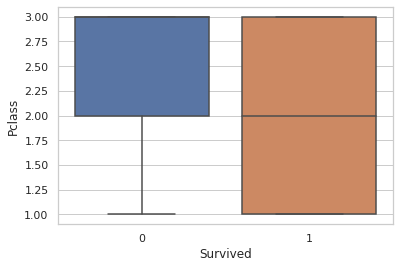

In [ ]:

sns.boxplot(x = 'Survived', y = 'Pclass', data =df)

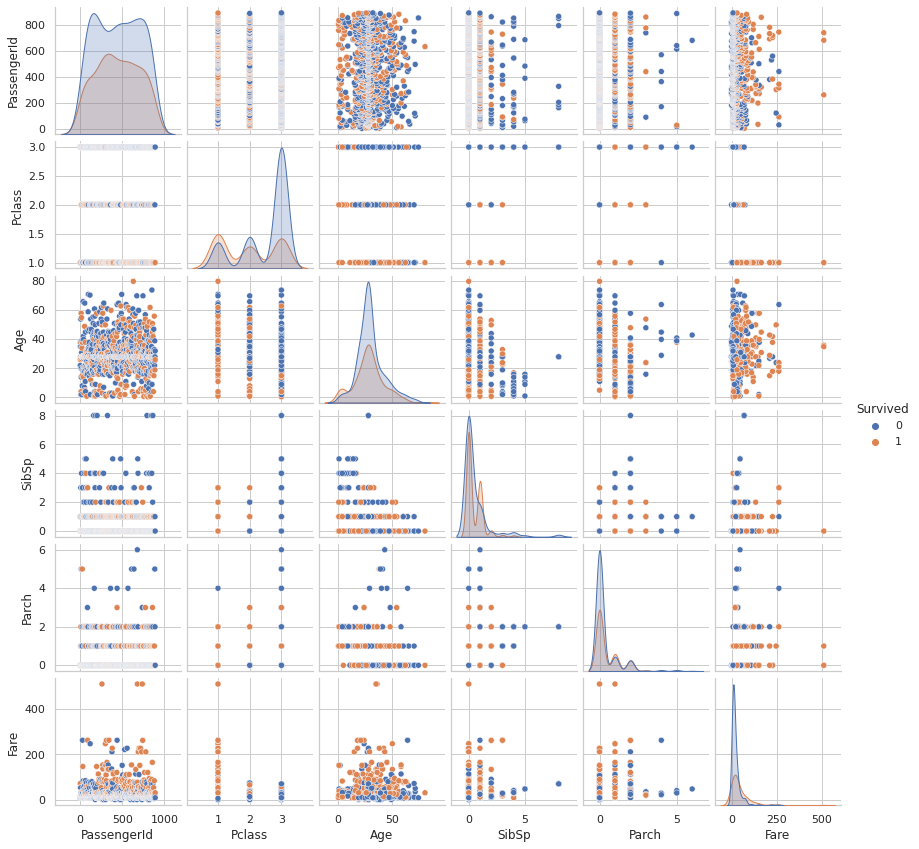

In [ ]:
sns.pairplot(df, hue = 'Survived', height =2 )
plt.show()

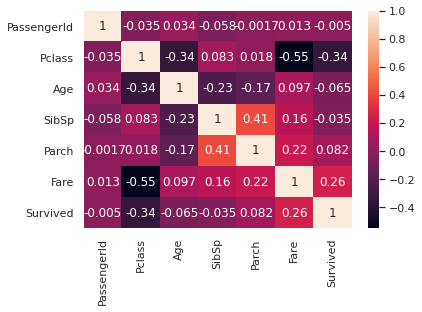

In [ ]:
sns.heatmap(df.corr(), annot = True)

# Inferences on survival:



1.   Probability of survival of females is 0.714
2.   Probability of surival of males is 0.1889



Who had the most odds of survival?
>> A female of around 29 yrs of age who had no children and was travelling in passenger class 1 had the most odds of survival.